In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

# import libaries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import re
import string
import os
from nltk.stem import WordNetLemmatizer
import  matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.svm import SVC ,LinearSVC 
from sklearn .model_selection import train_test_split ,GridSearchCV 
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier ,VotingClassifier  ,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier ,SGDClassifier,LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [5]:
#mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = 10, 7

# function of preprocessing

In [6]:
stop=nltk.corpus.stopwords.words('english')

In [7]:
def remove_punc(x):
    return ''.join([i for i in x if i not in string.punctuation]).lower()

In [8]:
def spilt_txt(x):
    return re.split('\W+',x)

In [9]:
lemma=WordNetLemmatizer()
def remove_stop(x):
    return ' '.join([lemma.lemmatize(i) for i in x if i not in stop])

# read dataset

In [10]:
data_train=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin-1')
data_test=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding='latin-1')

In [11]:
data_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [12]:
data=pd.concat([data_train,data_test])

# encode function

In [13]:
def change(x) :
    dic={'Positive':2, 'Neutral':1, 'Extremely Positive':2, 'Extremely Negative':0,
       'Negative':0}
    return dic[x]

In [14]:
data=data.sample(len(data))

In [15]:
data=data[['OriginalTweet','Sentiment']]

<Axes: >

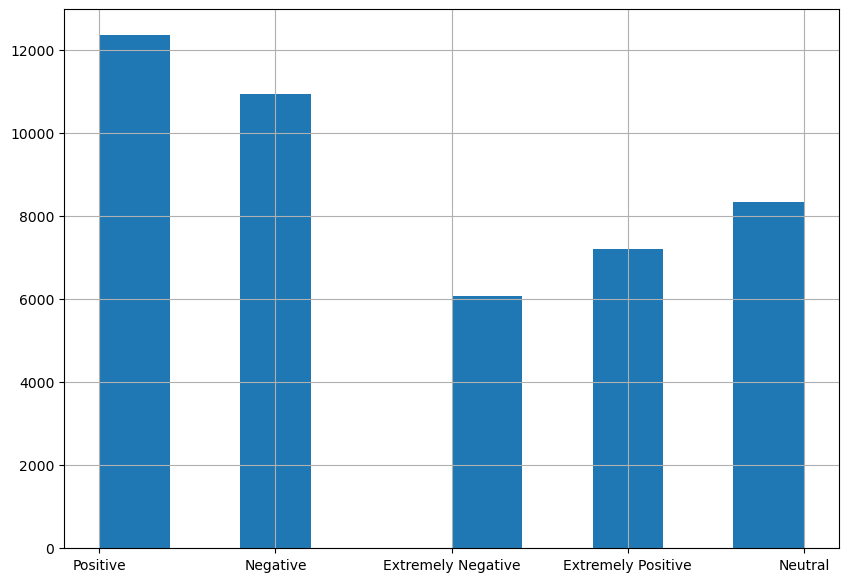

In [16]:
data['Sentiment'].hist()

# apply preprocessing

In [17]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [18]:
data['OriginalTweet']=data['OriginalTweet'].apply(lambda x:remove_punc(x))
data['OriginalTweet']=data['OriginalTweet'].apply(lambda x:spilt_txt(x))
data['OriginalTweet']=data['OriginalTweet'].apply(lambda x:remove_stop(x))
data['text']=data['Sentiment']
data['Sentiment']=data['Sentiment'].apply(lambda x:change(x))


In [19]:
data['Sentiment'].unique()

array([2, 0, 1])

In [20]:
from sklearn.decomposition import PCA

In [21]:
!pip install plotly

# Vectoriztion

In [22]:
tf_tranform=TfidfVectorizer()
x_tf=tf_tranform.fit_transform(data['OriginalTweet'])
count_tranform=CountVectorizer()
x_count=count_tranform.fit_transform(data['OriginalTweet'])

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x_count,data['Sentiment'])

In [24]:
pca=PCA(n_components=3)
pca.fit(x_count[:5000].toarray())

PCA(n_components=3)

In [25]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [26]:
pca_pred=pca.transform(x_count[:100].toarray())
import plotly.express as px
df = pd.DataFrame({'sepal_length':pca_pred[:,0],'sepal_width':pca_pred[:,1],'petal_width':pca_pred[:,2],'color':data.iloc[:100,1]*60,'text':data.iloc[:100,2]})
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
             color='color',text='text')
fig.update_traces(textfont=dict(
    size=7
))
fig.show()

# Try LogisticRegression

accuracy is  0.7989144941720794
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      4310
           1       0.70      0.71      0.70      2085
           2       0.82      0.84      0.83      4844

    accuracy                           0.80     11239
   macro avg       0.78      0.78      0.78     11239
weighted avg       0.80      0.80      0.80     11239



<Axes: >

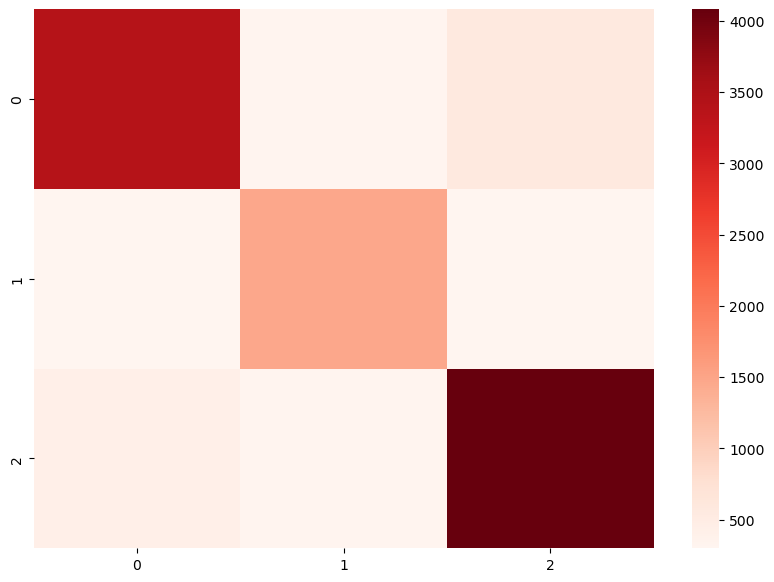

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')            

# try Ridge

accuracy is  0.7407242637245307
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      4310
           1       0.61      0.58      0.59      2085
           2       0.78      0.80      0.79      4844

    accuracy                           0.74     11239
   macro avg       0.71      0.71      0.71     11239
weighted avg       0.74      0.74      0.74     11239



<Axes: >

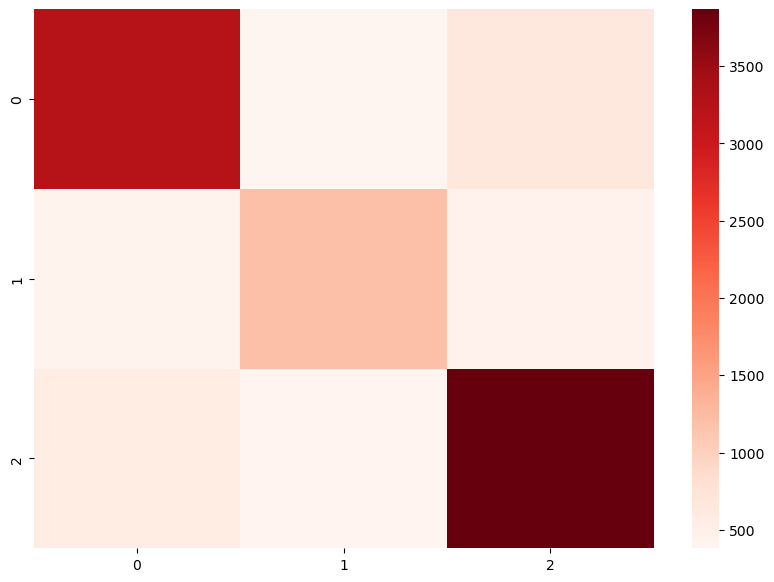

In [28]:
model=RidgeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))


y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')            

# try xgboost

accuracy is  0.816887623454044
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4310
           1       0.73      0.73      0.73      2085
           2       0.84      0.85      0.85      4844

    accuracy                           0.82     11239
   macro avg       0.80      0.80      0.80     11239
weighted avg       0.82      0.82      0.82     11239



<Axes: >

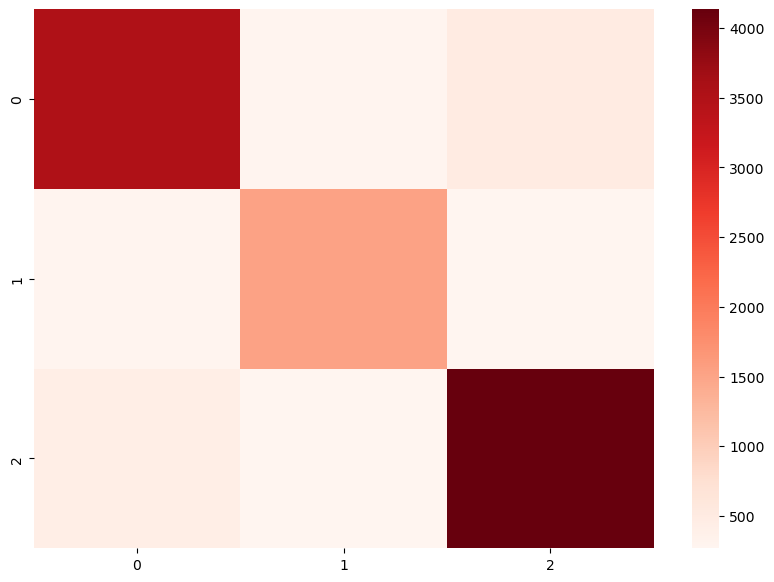

In [29]:
model=SGDClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))

y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')            

# Try bayes naive


accuracy is  0.6748821069490168
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4310
           1       0.75      0.21      0.33      2085
           2       0.66      0.82      0.73      4844

    accuracy                           0.67     11239
   macro avg       0.70      0.59      0.59     11239
weighted avg       0.69      0.67      0.65     11239



<Axes: >

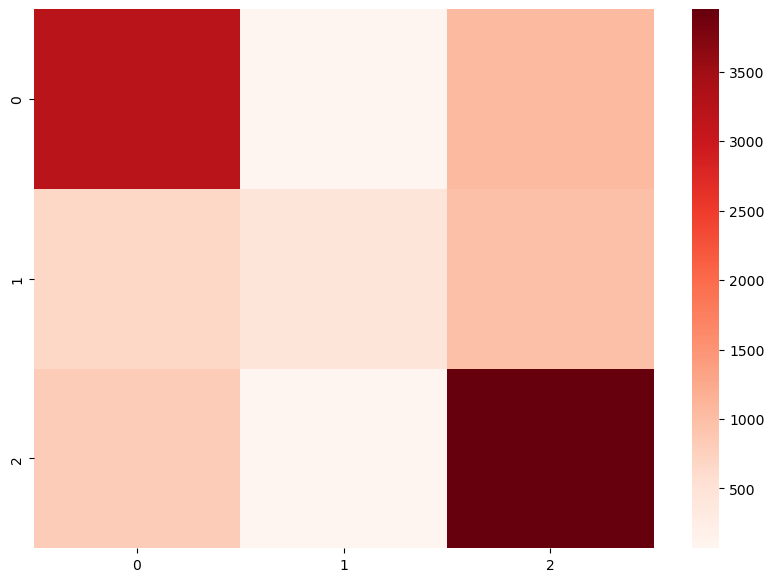

In [30]:
model=MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')     

# Try Random Forest

accuracy is  0.7585194412314262
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4310
           1       0.71      0.69      0.70      2085
           2       0.76      0.83      0.79      4844

    accuracy                           0.76     11239
   macro avg       0.75      0.74      0.75     11239
weighted avg       0.76      0.76      0.76     11239



<Axes: >

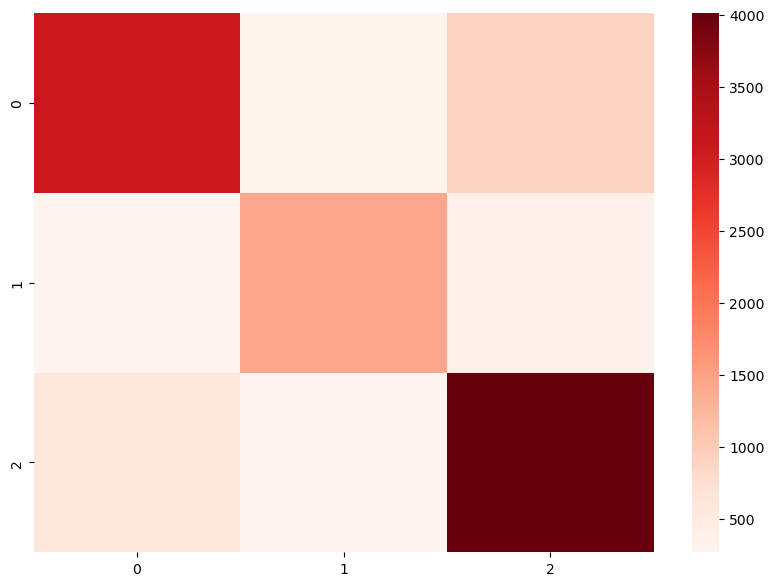

In [31]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')     

# AdaBoostClassifier

accuracy is  0.6236319957291574
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      4310
           1       0.40      0.71      0.51      2085
           2       0.79      0.62      0.69      4844

    accuracy                           0.62     11239
   macro avg       0.62      0.64      0.61     11239
weighted avg       0.67      0.62      0.63     11239



<Axes: >

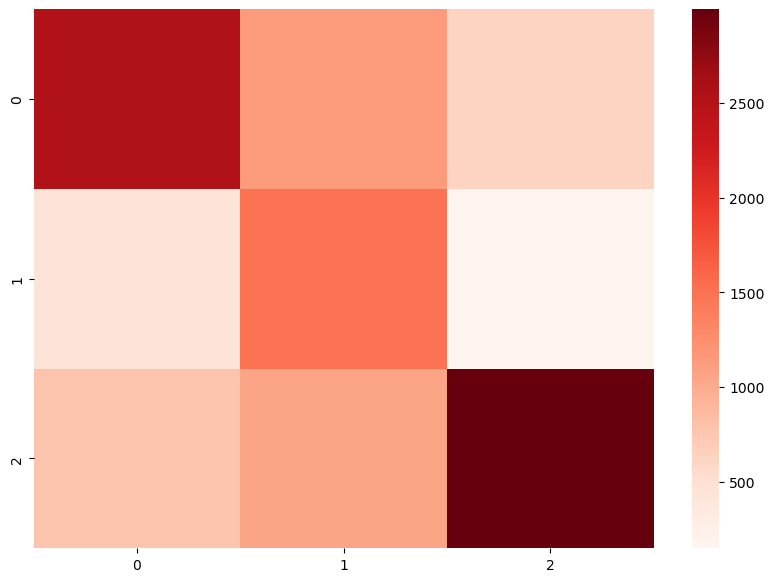

In [32]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')     

# Try XGboost

In [33]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth = [1,3,5,7]
n_estimators = [5,10,100,500]
grid_params ={'max_depth':max_depth,'n_estimators':n_estimators, 'learning_rate':learning_rate}

model = GridSearchCV(XGBClassifier(), grid_params,
                      scoring = 'accuracy', cv=10,n_jobs=-1, return_train_score=True)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8013168431355103

# try all in one using VotingClassifier

accuracy is  0.8136844915028028
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4310
           1       0.70      0.81      0.75      2085
           2       0.83      0.83      0.83      4844

    accuracy                           0.80     11239
   macro avg       0.79      0.80      0.79     11239
weighted avg       0.81      0.80      0.80     11239



<Axes: >

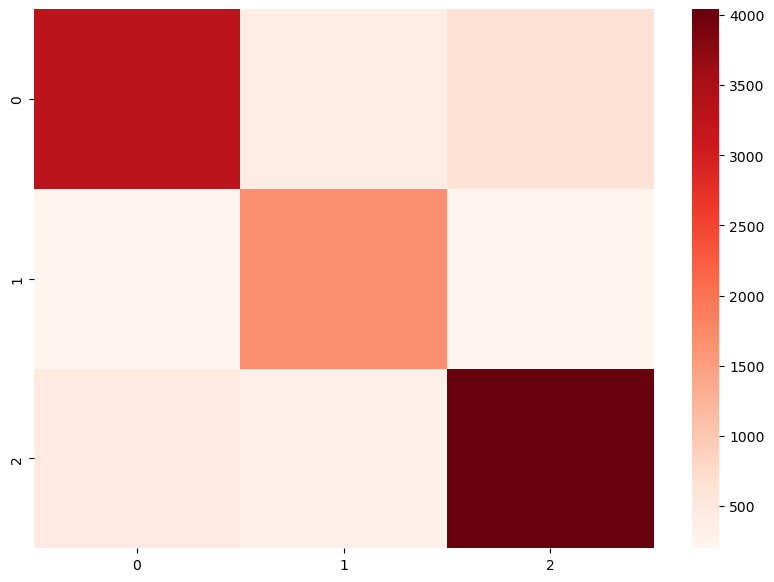

In [34]:
vote=VotingClassifier([('ridge',RidgeClassifier()),('sgd',SGDClassifier()),('log',LogisticRegression()),('linear svc',LinearSVC()),('svc',SVC()),('rf',RandomForestClassifier()),('xg',model)])
vote.fit(x_train,y_train)
vote.score(x_test,y_test)
print('accuracy is ',vote.score(x_test,y_test))


y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')            

# try tf idf victorizer with SVM

In [35]:
x_train,x_test,y_train,y_test =train_test_split(x_tf,data['Sentiment'])

accuracy is  0.796245217546045
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4265
           1       0.72      0.64      0.68      2114
           2       0.81      0.86      0.83      4860

    accuracy                           0.80     11239
   macro avg       0.78      0.77      0.77     11239
weighted avg       0.79      0.80      0.79     11239



<Axes: >

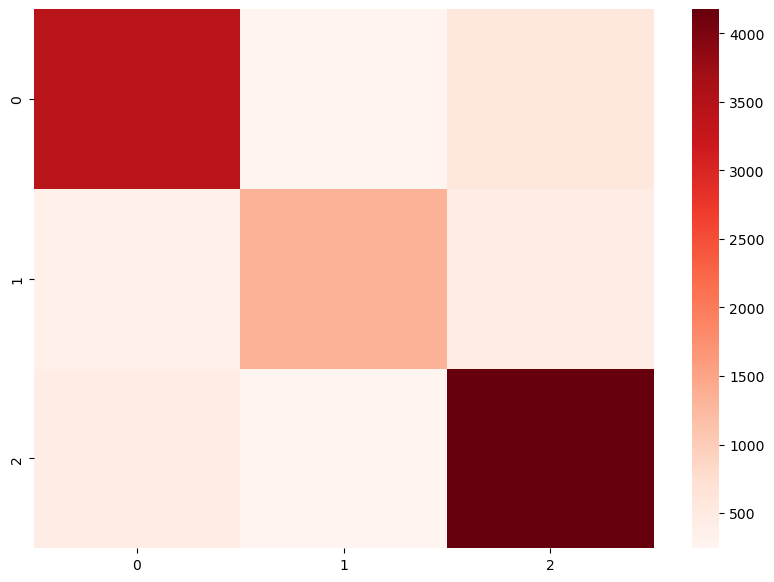

In [36]:

model=LinearSVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')         

accuracy is  0.7660823916718569
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4265
           1       0.74      0.50      0.60      2114
           2       0.77      0.86      0.81      4860

    accuracy                           0.77     11239
   macro avg       0.76      0.72      0.73     11239
weighted avg       0.76      0.77      0.76     11239



<Axes: >

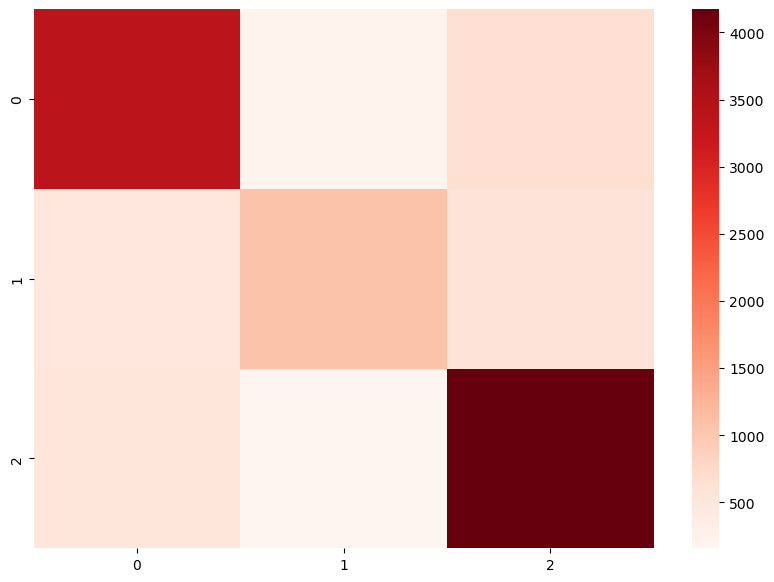

In [37]:
model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('accuracy is ',model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='Reds')         